<a href="https://colab.research.google.com/github/Suryanshu-Pugla/INDE-577--Data-Science-Machine-Learning/blob/main/Supervised%20Learning/4.%20Neural%20Networks/Neural_Networks_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
# Load dataset (e.g., Social Network Ads)
data = pd.read_csv("Social_Network_Ads.csv")

# Select features and target
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Initialize the neural network
model = Sequential()

# Add input and hidden layers
model.add(Dense(16, activation='relu', input_dim=X.shape[1]))  # 16 neurons
model.add(Dense(8, activation='relu'))                        # 8 neurons in hidden layer

# Add output layer
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6006 - loss: 0.6446 - val_accuracy: 0.7031 - val_loss: 0.6243
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6698 - loss: 0.6249 - val_accuracy: 0.7031 - val_loss: 0.6130
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6350 - loss: 0.6219 - val_accuracy: 0.7344 - val_loss: 0.6012
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6865 - loss: 0.6150 - val_accuracy: 0.7656 - val_loss: 0.5878
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7538 - loss: 0.5965 - val_accuracy: 0.8125 - val_loss: 0.5727
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7961 - loss: 0.5794 - val_accuracy: 0.8281 - val_loss: 0.5573
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7868 - loss: 0.5569 - val_accuracy: 0.8438 - val_loss: 0.5419
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7991 - loss: 0.5487 - val_accuracy: 0.8438 - val_loss: 0.5261
Epoch 9

In [17]:
# Predict on test data
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print(classification_report(y_test, y_pred))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        52
           1       0.84      0.96      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



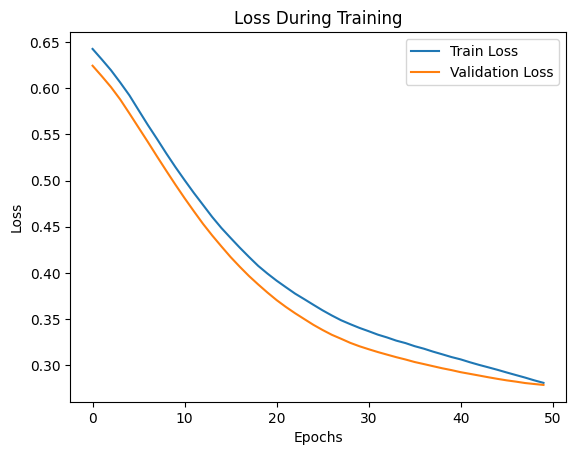

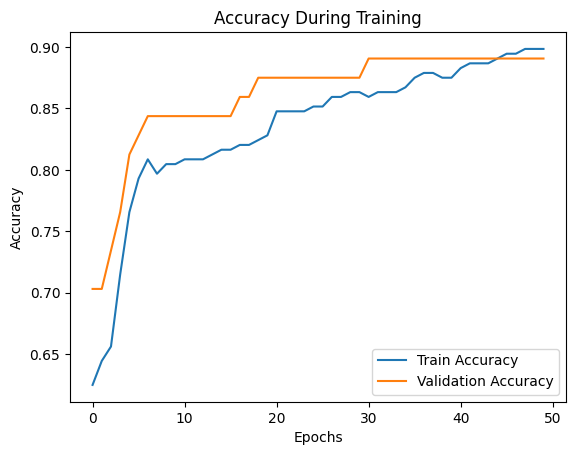

In [18]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


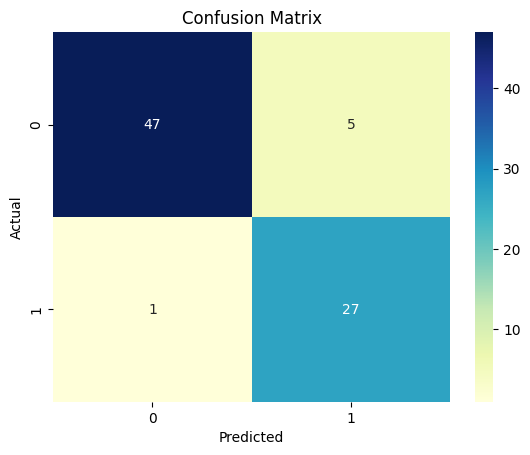

In [19]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()